In [1]:
import pandas as pd

# Load the dataset
file_path = '[Doctor Anywhere] dataset-stroke-train_to_candidate.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
0,1,80,0,0,0,75.620000,25.100000,0
1,0,64,0,0,2,113.680000,24.200000,0
2,0,73,1,0,2,71.290000,37.700000,0
3,0,71,0,1,2,218.092005,29.950318,1
4,1,51,0,0,2,92.950000,23.900000,0


1. Đọc dữ liệu từ file CSV.
2. Kiểm tra cấu trúc và loại dữ liệu của các cột.
3. Thực hiện một số biểu đồ cơ bản để trực quan hóa các feature.
4. Kiểm tra và trực quan hóa các mối tương quan giữa các feature, nếu có.

In [2]:
# Check the data types and missing values
data_info = data.info()
data_info

# Also, summarizing the data for basic statistics
data_description = data.describe()
data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5055 non-null   int64  
 1   age                5055 non-null   int64  
 2   hypertension       5055 non-null   int64  
 3   heart_disease      5055 non-null   int64  
 4   work_type          5055 non-null   int64  
 5   avg_glucose_level  5055 non-null   float64
 6   bmi                5055 non-null   float64
 7   stroke             5055 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 316.1 KB


,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
count,5055.000000,5055.000000,5055.000000,5055.000000,5055.000000,5055.000000,5055.000000,5055.000000
mean,0.533729,47.731949,0.091592,0.054402,29.408902,111.276830,29.166742,0.229080
std,0.498910,23.111256,0.288478,0.226831,80.755149,50.209475,7.305279,0.420282
min,0.000000,0.000000,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,77.515000,24.400000,0.000000
50%,1.000000,51.000000,0.000000,0.000000,0.000000,93.411304,28.600000,0.000000
75%,1.000000,67.000000,0.000000,0.000000,1.000000,121.180000,32.796912,0.000000
max,1.000000,82.000000,1.000000,1.000000,255.000000,271.740000,97.600000,1.000000


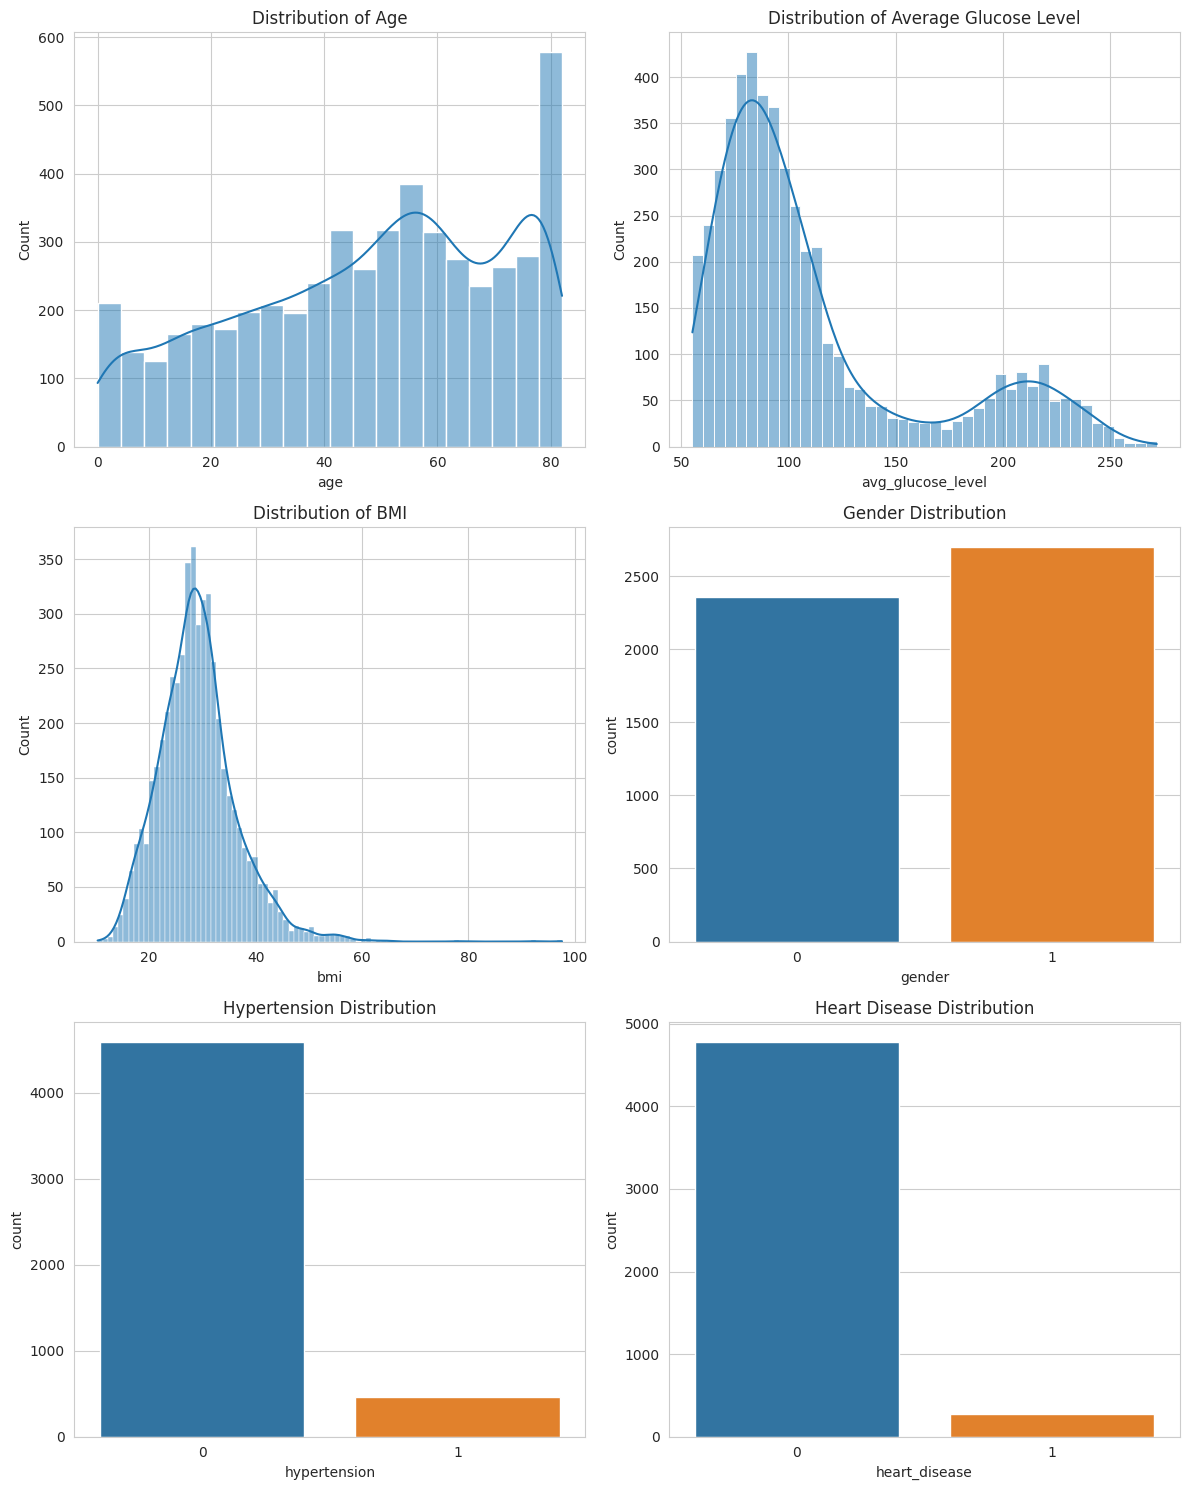

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Histograms for numerical variables
sns.histplot(data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data['avg_glucose_level'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Glucose Level')

sns.histplot(data['bmi'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of BMI')

# Bar charts for categorical variables
sns.countplot(x='gender', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')

sns.countplot(x='hypertension', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Hypertension Distribution')

sns.countplot(x='heart_disease', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Heart Disease Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


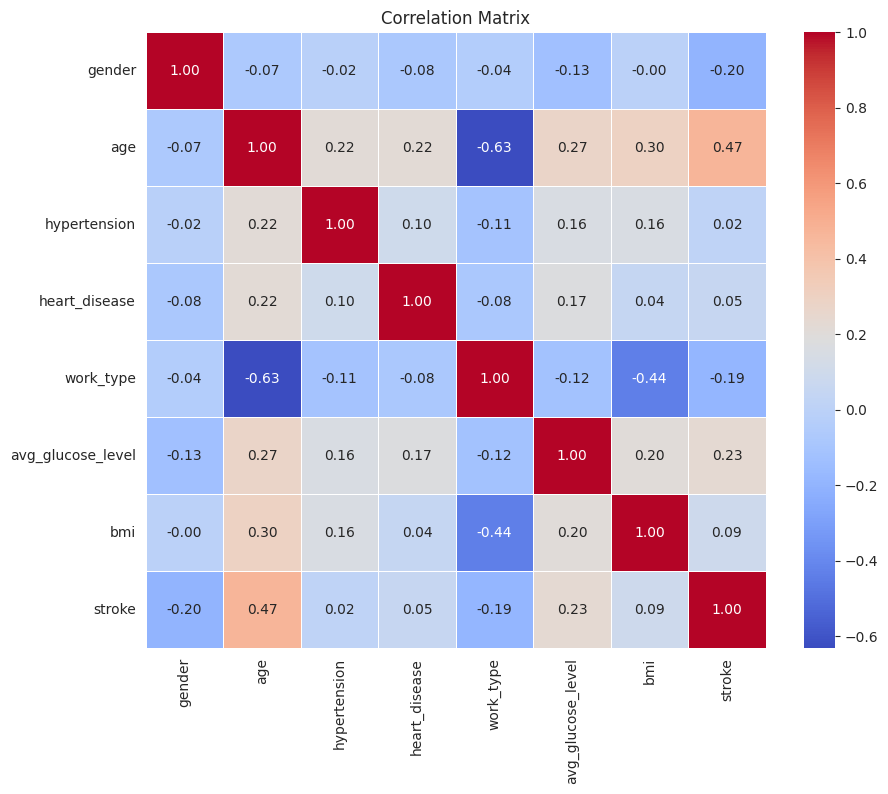

In [4]:
# Computing the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare Data
X = data.drop('stroke', axis=1)  # Features
y = data['stroke']  # Target variable

# Split to Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model Evaluation 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8793273986152325
Confusion Matrix:
 [[718  60]
 [ 62 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       778
           1       0.74      0.73      0.74       233

    accuracy                           0.88      1011
   macro avg       0.83      0.83      0.83      1011
weighted avg       0.88      0.88      0.88      1011



In [9]:
from sklearn.model_selection import GridSearchCV

# Improve model by tuning parameters by GridSearch ---> Model-Centric 

# Create new Model: XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best params
print("Best parameters:", grid_search.best_params_)

# Evaluate best model in testing data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Improved Accuracy:", accuracy)



Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Improved Accuracy: 0.8664688427299704


In [37]:
from sklearn.preprocessing import RobustScaler

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Build Model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train model with scaled data
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Model Evaluation 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8813056379821959
Confusion Matrix:
 [[717  61]
 [ 59 174]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       778
         1.0       0.74      0.75      0.74       233

    accuracy                           0.88      1011
   macro avg       0.83      0.83      0.83      1011
weighted avg       0.88      0.88      0.88      1011



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.impute import SimpleImputer

# Init imputer and fill NaN by mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Prepare Data
# X = data.drop('stroke', axis=1)  # Features
y = data['stroke']  # Target variable

# Split to Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model with adjusted parameters
model = RandomForestClassifier(
    n_estimators=50,      # Number os tress
    max_depth=25,         # Max Depth of trees
    min_samples_split=2,  # Min number sample to divide 1 node
    min_samples_leaf=1,   # Min number sample in leaf node
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model Evaluation 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8902077151335311
Confusion Matrix:
 [[729  49]
 [ 62 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       778
           1       0.78      0.73      0.75       233

    accuracy                           0.89      1011
   macro avg       0.85      0.84      0.84      1011
weighted avg       0.89      0.89      0.89      1011

